Import Libraries

In [2]:
pip install matplotlib

  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl (2.3 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

df = pd.read_csv('/Users/battih/Desktop/Personal/demand-forecasting-walmart/data/processed/base_dataset.csv',parse_dates=['Date'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [8]:
series = df[(df['Store']==1) & (df['Dept']==1)].sort_values('Date')
series.shape

(143, 17)

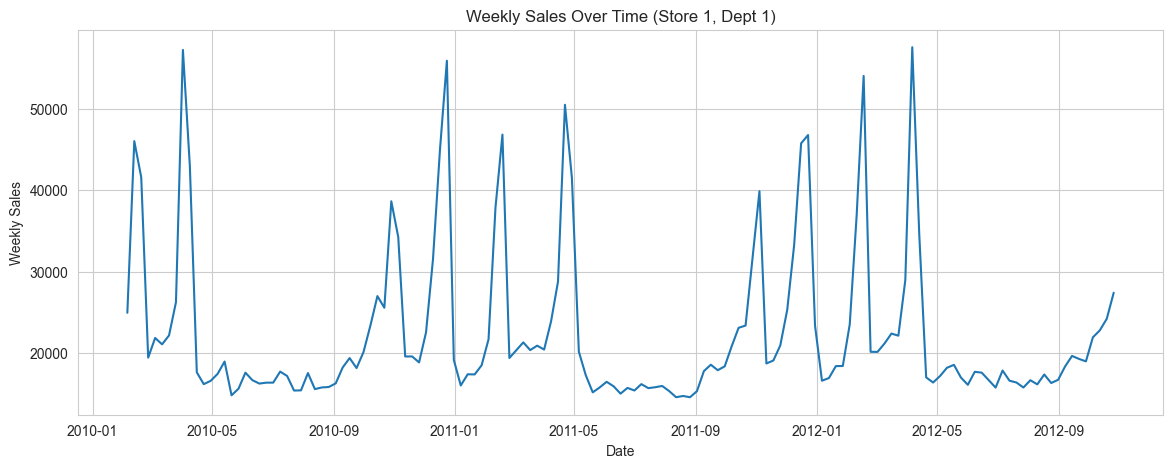

In [9]:
plt.figure(figsize=(14,5))
plt.plot(series['Date'], series['Weekly_Sales'])
plt.title('Weekly Sales Over Time (Store 1, Dept 1)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

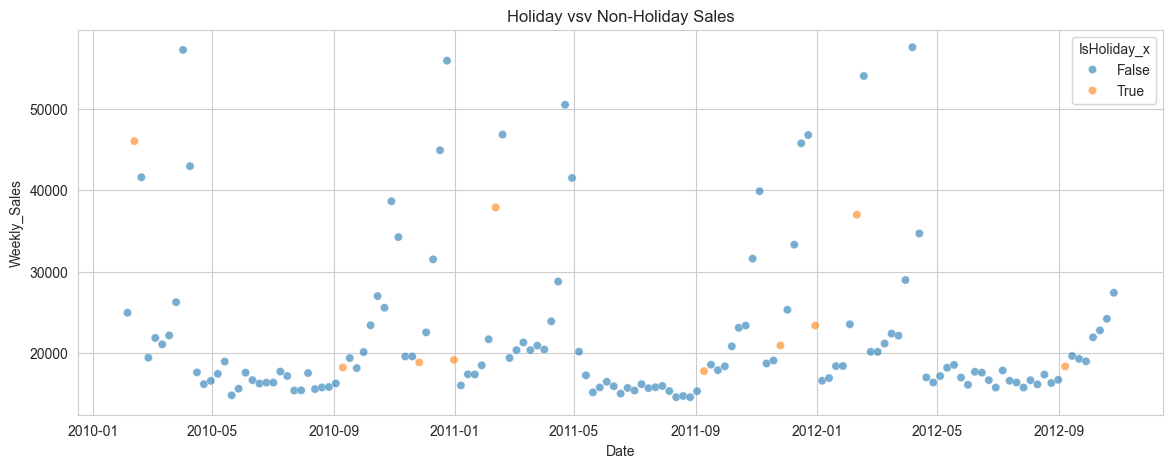

In [12]:
plt.figure(figsize=(14,5))
sns.scatterplot(
    data=series,
    x='Date',
    y='Weekly_Sales',
    hue='IsHoliday_x',
    alpha=0.6
)
plt.title('Holiday vsv Non-Holiday Sales')
plt.show()

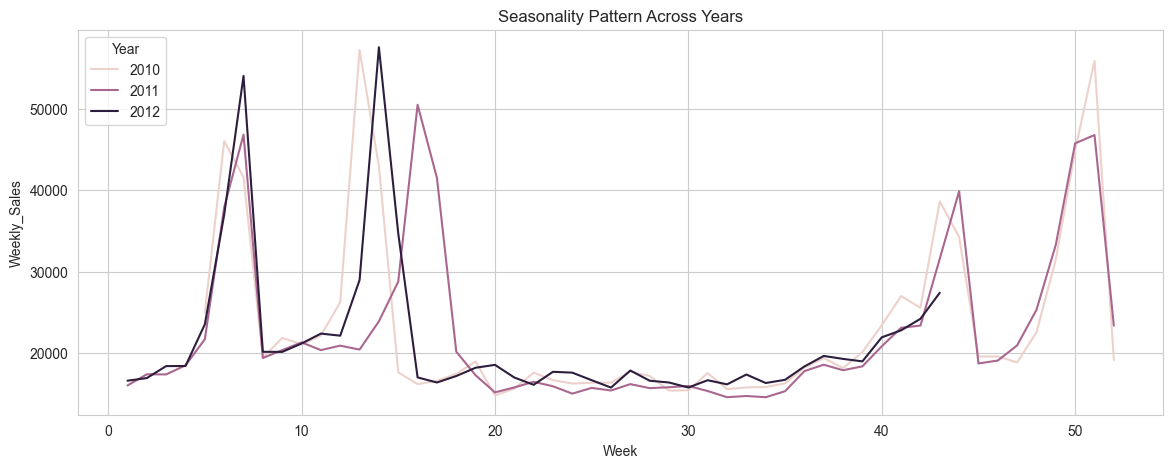

In [13]:
series['Year'] = series['Date'].dt.year
series['Week'] = series['Date'].dt.isocalendar().week

plt.figure(figsize=(14,5))
sns.lineplot(
    data=series,
    x='Week',
    y='Weekly_Sales',
    hue='Year',
    estimator=None
)

plt.title('Seasonality Pattern Across Years')
plt.show()

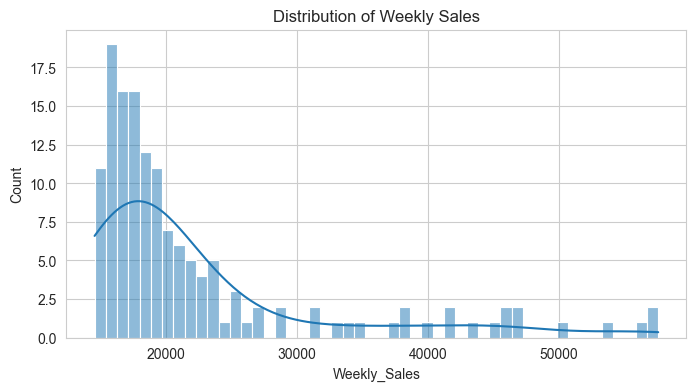

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(series['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.show()

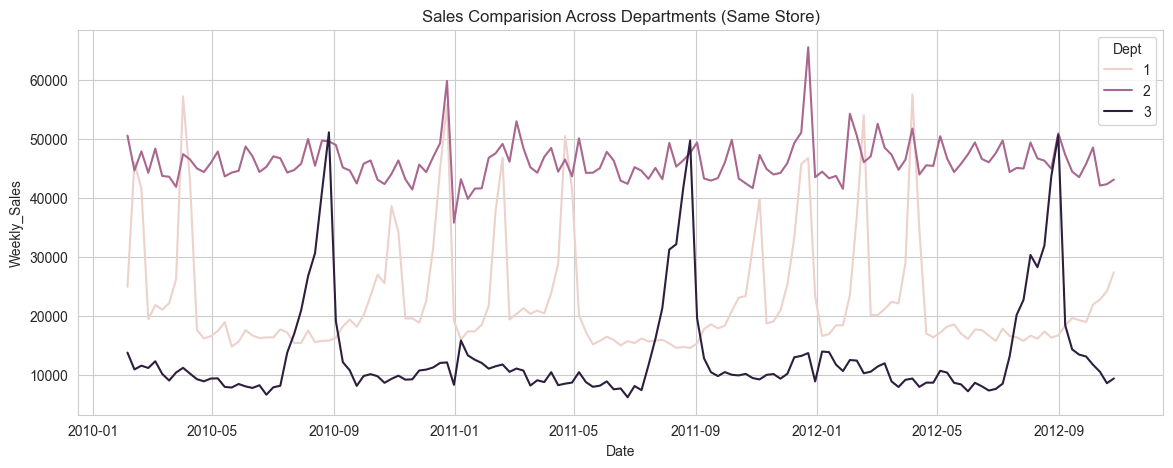

In [16]:
sample_multi = df[
    (df['Store']==1) & 
    (df['Dept'].isin([1,2,3]))
]

plt.figure(figsize=(14,5))
sns.lineplot(
    data = sample_multi,
    x='Date',
    y='Weekly_Sales',
    hue='Dept'
)

plt.title('Sales Comparision Across Departments (Same Store)')
plt.show()

In [17]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [18]:
external_features = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

series[external_features + ['Weekly_Sales']].corr()['Weekly_Sales']

Temperature    -0.473860
Fuel_Price     -0.066396
CPI            -0.043533
Unemployment    0.103399
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64

In [19]:
pip install statsmodels

  Using cached statsmodels-0.14.6-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
Using cached statsmodels-0.14.6-cp313-cp313-win_amd64.whl (9.5 MB)
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)
Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl (36.3 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(
    series.set_index('Date')['Weekly_Sales'],
    model='additive',
    period=52
)


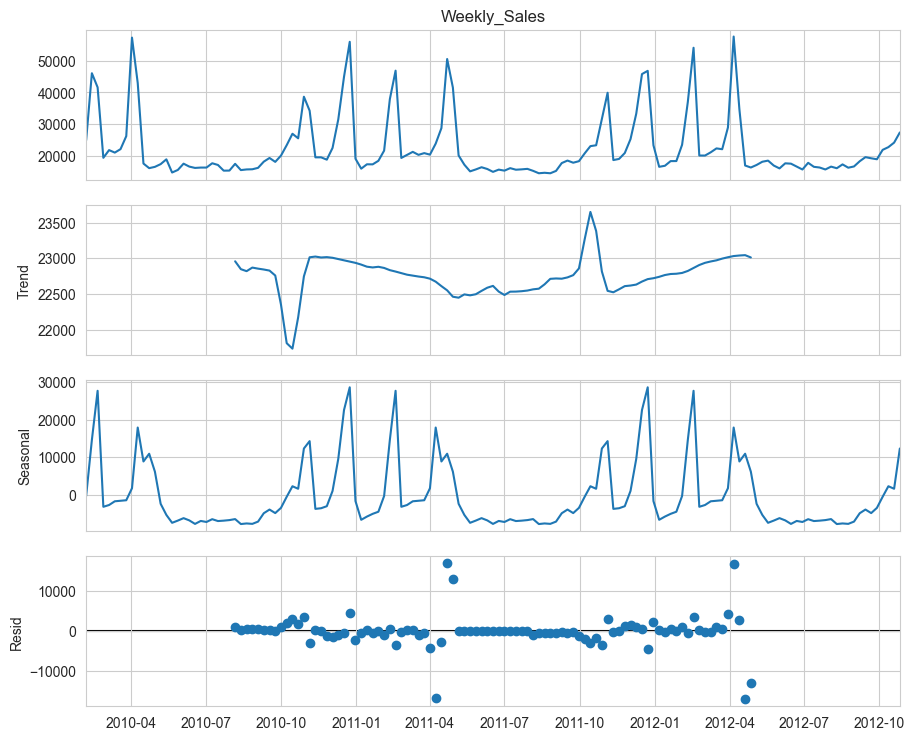

In [24]:
fig = decomp.plot()
fig.set_size_inches(10, 8)
plt.show()

# Access individual components
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid